# import lib

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

 # Data set

In [11]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.shape

(569, 33)

# 2.Train/test split and standardize features.


In [16]:

# Split into features and target
X = df.drop('diagnosis', axis=1)  # Independent variables
y = df['diagnosis']              # Dependent variable


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3.Fit a Logistic Regression model.

In [21]:

from sklearn.linear_model import LogisticRegression

# Increase max_iter or change solver
model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X_train, y_train)



LogisticRegression(max_iter=5000)

 # 4.Evaluate with confusion matrix, precision, recall, ROC-AUC.

🔹 Confusion Matrix:
 [[70  1]
 [ 4 39]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

🔹 Precision: 0.975
🔹 Recall: 0.9069767441860465
🔹 ROC-AUC Score: 0.9977071732721914


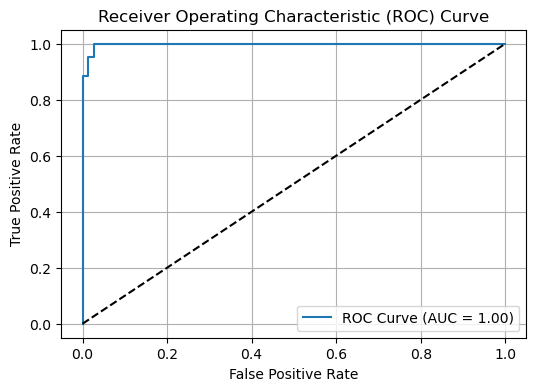

In [24]:
from sklearn.metrics import (
    confusion_matrix, precision_score,
    recall_score, roc_auc_score,
    classification_report, roc_curve
)


# Predict labels and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("🔹 Confusion Matrix:\n", cm)

# Classification Report (includes precision, recall, f1-score)
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Precision and Recall
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall:", recall_score(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("🔹 ROC-AUC Score:", roc_auc)

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


 # 5.Tune threshold and explain sigmoid function.

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Predict probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold (e.g., 0.4)
threshold = 0.4
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate at new threshold
cm = confusion_matrix(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)

print(f"\n🔹 Evaluation at Threshold = {threshold}")
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)


NameError: name 'X_test_scaled' is not defined